In [1]:
from environments.cleanup_env import CleanupEnv

2023-10-02 13:08:50,658	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
num_agents_cleanup = 2
env = CleanupEnv(num_agents_cleanup)

In [3]:
discount_factor = 0.99
eps = 0.2
eps_decay_factor = 0.999
num_episodes = 50
alpha = 0.1
batch_size = 10

In [4]:
from models.decentralized import DecentralizedModel
models = {}
for i in range(num_agents_cleanup):
    models[str(i)] = DecentralizedModel(env, 1, None, 'decentralized' + '-' + str(i))
    models[str(i)].compile(loss='mse', optimizer='adam', metrics=['mae'])
    models[str(i)].summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
pos_input (InputLayer)          [(None, 2, 2)]       0                                            
__________________________________________________________________________________________________
state_input (InputLayer)        [(None, 25, 18)]     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 4)            0           pos_input[0][0]                  
__________________________________________________________________________________________________
flatten (Flatten)               (None, 450)          0           state_input[0][0]                
______________________________________________________________________________________________

In [5]:
from train import train
from test import test

In [6]:
_, train_stats = train(models, env, num_episodes, eps, eps_decay_factor, discount_factor, alpha, batch_size)

/Users/gabeguralnick/git/social_reinforcement_learning/venv/lib/python3.10/site-packages/tensorflow/python/keras/engine/training.py:2456: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Episode 1/50 (total reward: 9)
Agent rewards: [4, 5]
Episode 2/50 (total reward: 12)
Agent rewards: [6, 6]
Episode 3/50 (total reward: 20)
Agent rewards: [9, 11]
Episode 4/50 (total reward: 29)
Agent rewards: [20, 9]
Episode 5/50 (total reward: 65)
Agent rewards: [39, 26]
Episode 6/50 (total reward: 34)
Agent rewards: [14, 20]
Episode 7/50 (total reward: 19)
Agent rewards: [11, 8]
Episode 8/50 (total reward: 38)
Agent rewards: [20, 18]
Episode 9/50 (total reward: 34)
Agent rewards: [20, 14]
Episode 10/50 (total reward: 48)
Agent rewards: [33, 15]
Episode 11/50 (total reward: 32)
Agent rewards: [12, 20]
Episode 12/50 (total reward: 37)
Agent rewards: [19, 18]
Episode 13/50 (total reward: 42)
Agent rewards: [27, 15]
Episode 14/50 (total reward: 32)
Agent rewards: [13, 19]


KeyboardInterrupt: 

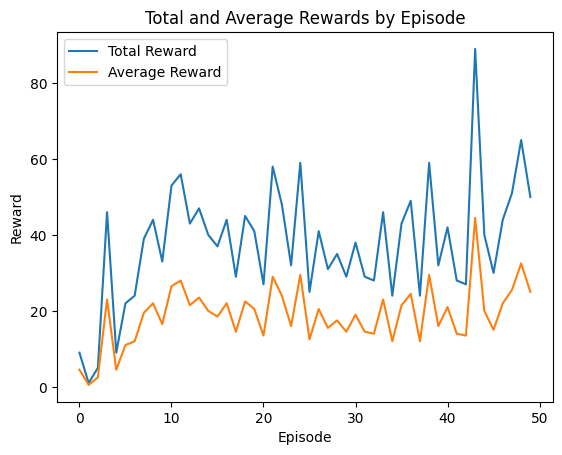

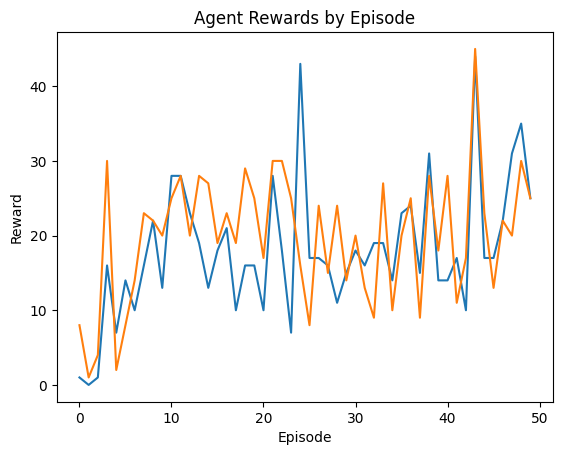

In [7]:
import visualize
visualize.plot_total_and_average_rewards(train_stats)
visualize.plot_agent_rewards(train_stats)

In [11]:
num_episodes = 100
test_stats = test(models, env, num_episodes, eps, eps_decay_factor)

Episode 2/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0': 0, '1': 0})
Episode 3/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0': 0, '1': 0})
Episode 4/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0': 0, '1': 0})
Episode 5/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0': 0, '1': 0})
Episode 6/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0': 0, '1': 0})
Episode 7/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0': 0, '1': 0})
Episode 8/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0': 0, '1': 0})
Episode 9/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0': 0, '1': 0})
Episode 10/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0': 0, '1': 0})
Episode 11/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0': 0, '1': 0})
Episode 12/100 (total reward: 0)
Agent rewards: defaultdict(<class 'int'>, {'0

KeyboardInterrupt: 

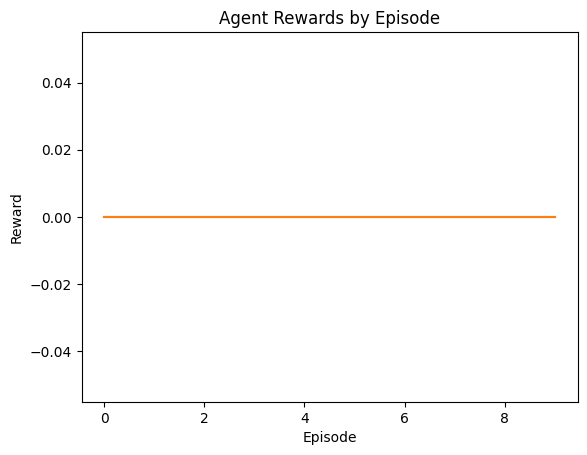

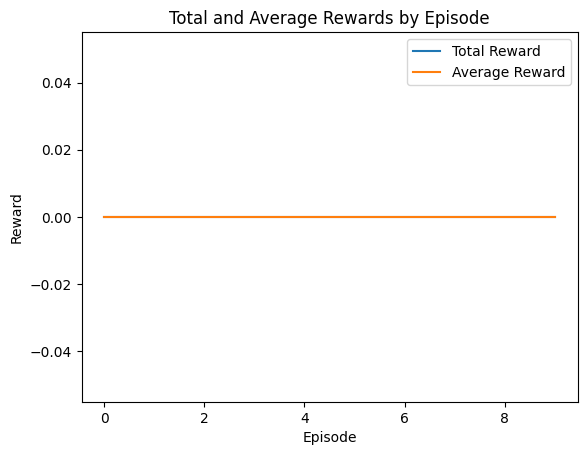

In [10]:
visualize.plot_agent_rewards(test_stats)
visualize.plot_total_and_average_rewards(test_stats)